In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# from sklearn.decomposition import PCA

# Task4 Cows

In [27]:
data={
    "name":["Clover","Sunny","Rose","Daisy","Strawberry","Molly"],
    "race":["Holstein","Ayrshir","Holstein","Ayrshir","Finncattle","Ayrshir"],
    "age" :[2,2,5,4,7,8],
    "milk":[20,10,15,25,35,45],
    "character":["lively","kind","calm","calm","calm","kind"],
    "music":["rock","rock","country","classical","classical","country"]
}

cows=pd.DataFrame(data)

cows


,name,race,age,milk,character,music
0,Clover,Holstein,2,20,lively,rock
1,Sunny,Ayrshir,2,10,kind,rock
2,Rose,Holstein,5,15,calm,country
3,Daisy,Ayrshir,4,25,calm,classical
4,Strawberry,Finncattle,7,35,calm,classical
5,Molly,Ayrshir,8,45,kind,country


In [28]:
cows["age_scaler"]=(cows["age"]-cows["age"].min())/(cows["age"].max()-cows["age"].min())

cows["milk_scaler"]=(cows["milk"]-cows["milk"].min())/(cows["milk"].max()-cows["milk"].min())

cows

,name,race,age,milk,character,music,age_scaler,milk_scaler
0,Clover,Holstein,2,20,lively,rock,0.000000,0.285714
1,Sunny,Ayrshir,2,10,kind,rock,0.000000,0.000000
2,Rose,Holstein,5,15,calm,country,0.500000,0.142857
3,Daisy,Ayrshir,4,25,calm,classical,0.333333,0.428571
4,Strawberry,Finncattle,7,35,calm,classical,0.833333,0.714286
5,Molly,Ayrshir,8,45,kind,country,1.000000,1.000000


In [29]:
ndata=np.array(cows[["age_scaler","milk_scaler"]])

ndata

array([[0.        , 0.28571429],
       [0.        , 0.        ],
       [0.5       , 0.14285714],
       [0.33333333, 0.42857143],
       [0.83333333, 0.71428571],
       [1.        , 1.        ]])

In [51]:
# Compute numerical similarity
def get_numsim_M(ndata):
    lens=len(ndata)

    SM=np.zeros((lens,lens))

    for i in range(lens):
        j=i+1
        while j <lens:
            tep=(ndata[i][0]-ndata[j][0])**2+(ndata[i][1]-ndata[j][1])**2
            tep=np.sqrt(tep)
            SM[i][j]=SM[j][i]=tep
            j=j+1
    return SM.round(4)

re=get_numsim_M(ndata)

re     
    

array([[0.    , 0.2857, 0.52  , 0.3627, 0.9371, 1.2289],
       [0.2857, 0.    , 0.52  , 0.5429, 1.0976, 1.4142],
       [0.52  , 0.52  , 0.    , 0.3308, 0.6615, 0.9923],
       [0.3627, 0.5429, 0.3308, 0.    , 0.5759, 0.8781],
       [0.9371, 1.0976, 0.6615, 0.5759, 0.    , 0.3308],
       [1.2289, 1.4142, 0.9923, 0.8781, 0.3308, 0.    ]])

# Similarity for Categories

In [31]:
dic={"Ayrshir": 1/2,"Holstein": 1/3,"Finncattle": 1/6,
        "lively":1/6,"kind":1/3,"calm":1/2,
        "rock":1/3,"country":1/3,"classical":1/3}

In [32]:
ccols=["race","character","music"]
cdata=np.array(cows[ccols])
cdata

array([['Holstein', 'lively', 'rock'],
       ['Ayrshir', 'kind', 'rock'],
       ['Holstein', 'calm', 'country'],
       ['Ayrshir', 'calm', 'classical'],
       ['Finncattle', 'calm', 'classical'],
       ['Ayrshir', 'kind', 'country']], dtype=object)

In [33]:
def get_catsim_M(cdata,dic):
    lens,f_num=cdata.shape

    CM=np.zeros((lens,lens))

    for i in range(lens):
        j=i+1
        while j <lens:
            tep=0
            for x in range(f_num):
                if cdata[i][x]==cdata[j][x]:
                    tep=tep+1-dic[cdata[i][x]]**2
            CM[i][j]=CM[j][i]=1-tep/f_num
            j=j+1
    return CM.round(4)

re=get_catsim_M(cdata,dic)

re

array([[0.    , 0.7037, 0.7037, 1.    , 1.    , 1.    ],
       [0.7037, 0.    , 1.    , 0.75  , 1.    , 0.4537],
       [0.7037, 1.    , 0.    , 0.75  , 0.75  , 0.7037],
       [1.    , 0.75  , 0.75  , 0.    , 0.4537, 0.75  ],
       [1.    , 1.    , 0.75  , 0.4537, 0.    , 1.    ],
       [1.    , 0.4537, 0.7037, 0.75  , 1.    , 0.    ]])

# Mix Similarity of number and category

In [52]:
numsim=get_numsim_M(ndata)
catsim=get_catsim_M(cdata,dic)

a=2/5

mixSim=a*numsim/np.std(numsim)+(1-a)*catsim/np.std(catsim)
mixSim=mixSim.round(3)
mixSim

array([[0.   , 1.507, 1.735, 2.1  , 2.658, 2.941],
       [1.507, 0.   , 2.253, 1.838, 2.814, 2.167],
       [1.735, 2.253, 0.   , 1.632, 1.953, 2.194],
       [2.1  , 1.838, 1.632, 0.   , 1.352, 2.164],
       [2.658, 2.814, 1.953, 1.352, 0.   , 2.069],
       [2.941, 2.167, 2.194, 2.164, 2.069, 0.   ]])

In [35]:
def show_hist(data,bins):
    x =[]
    for i in range(6):
        x.extend(data[i][i+1:6])
    # print(x)
    plt.hist(x, bins=bins)
    plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
    plt.show()

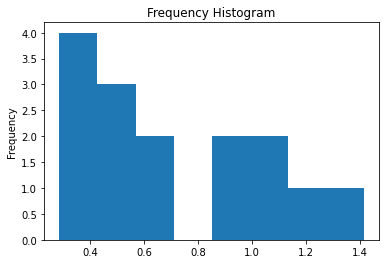

In [62]:
# numsim
show_hist(numsim,8)

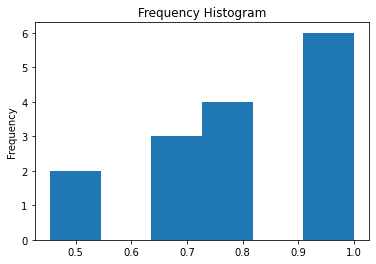

In [70]:
# catsisim
show_hist(catsim,6)

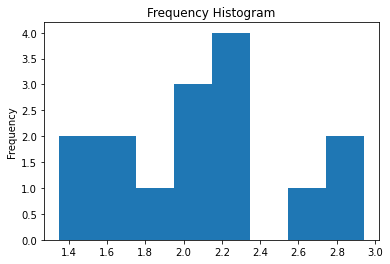

In [76]:
#mixsim

show_hist(mixSim,8)